In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

datos = pd.read_csv("voltajes_tarea.csv")
N = len(datos["voltaje(V)"])

datos

,lectura,voltaje(V)
0,0,95.36
1,1,87.09
2,2,89.22
3,3,91.58
4,4,95.88
...,...,...
99,99,91.91
100,100,88.01
101,101,95.28
102,102,99.31


---
## 1.1

In [3]:
mu = np.average(datos["voltaje(V)"])
sigma = np.std(datos["voltaje(V)"])

print(f'Promedio: {mu:0.2f} V')
print(f'Desviación estándar: {sigma:0.2f} V')

Promedio: 94.36 V
Desviación estándar: 5.84 V


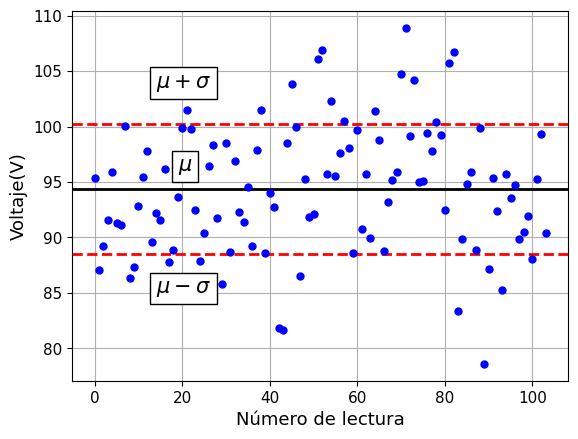

In [4]:
plt.figsize=(7, 6),
plt.axhline(y=mu, color='black', linestyle='-', linewidth=2)
plt.axhline(y=mu+sigma, color='red', linestyle='--', linewidth=2) 
plt.axhline(y=mu-sigma, color='red', linestyle='--', linewidth=2)
plt.plot(datos["lectura"], datos["voltaje(V)"], 'bo', markersize=5)
plt.xticks(size=11)
plt.yticks(size=11)

plt.xlabel("Número de lectura", fontsize=13)
plt.ylabel("Voltaje(V)", fontsize=13)
plt.grid()
plt.text(19,96,r"$\mu$", fontsize=15, bbox=dict(facecolor='white', alpha=1.0))
plt.text(14,103.5,r"$\mu + \sigma$", fontsize=15, bbox=dict(facecolor='white', alpha=1.0))
plt.text(14,85,r"$\mu - \sigma$", fontsize=15, bbox=dict(facecolor='white', alpha=1.0))
plt.savefig("voltajes.pdf")
plt.show()

---
## 1.2

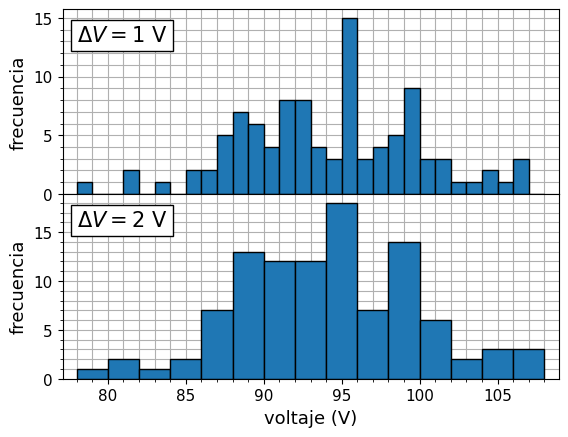

In [10]:
#https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
delta1 = 1
delta2 = 2

vmax = max(datos["voltaje(V)"])
vmin = min(datos["voltaje(V)"])
Delta = vmax-vmin


V1_bins = np.linspace(int(vmin), int(vmax), int(Delta/delta1)+1)
V2_bins = np.linspace(int(vmin), int(vmax), int(Delta/delta2)+1)

V1_hist, V1_bins = np.histogram(datos["voltaje(V)"], bins=V1_bins)
V2_hist, V2_bins = np.histogram(datos["voltaje(V)"], bins=V2_bins)


center1 = (V1_bins[:-1] + V1_bins[1:]) / 2
center2 = (V2_bins[:-1] + V2_bins[1:]) / 2

fig = plt.figure()
gs = fig.add_gridspec(2, hspace=0) # Sin espacio entre las gráficas
axis = gs.subplots(sharex=True, sharey=False)


#fig.suptitle("uwu")
axis[0].bar(center1, V1_hist, label=f"$\Delta$V=1 V", width=delta1, edgecolor="black")
axis[1].bar(center2, V2_hist, label=f"$\Delta$V=2 V", width=delta2, edgecolor="black")

for ii in range (len(axis)):
    axis[ii].set_ylabel("frecuencia",size=13)
    axis[ii].tick_params(axis="both", labelsize=11)
    #axis[ii].legend()
    axis[ii].label_outer() #Quita los ticks de las gráficas no fronteras
    axis[ii].minorticks_on()
    axis[ii].grid(which="both")
    axis[ii].set_axisbelow(True)


    
axis[0].text(78, 13, r"$\Delta V = 1$ V",fontsize=15, bbox=dict(facecolor='white', alpha=1.0))
axis[1].text(78, 15.6, r"$\Delta V = 2$ V",fontsize=15, bbox=dict(facecolor='white', alpha=1.0))


plt.xlim(int(vmin) - (vmax-vmin)*0.03, int(vmax) + (vmax-vmin)*0.03)
plt.xlabel("voltaje (V)", fontsize=13)
plt.savefig("histogramas.pdf")
plt.show()

---
## 1.3

In [12]:
aux = np.zeros(N)
for ii in range (N):
    aux[ii] = 1

In [16]:
def find_mu (n_barras, V, f):
    suma = 0
    suma2 = 0
    for ii in range (n_barras):
        Vprom = (V[ii] + V[ii+1])/2
        suma2+= f[ii]
        suma += Vprom*f[ii]
    return suma/suma2

def find_sigma (n_barras, V, f, prom):
    suma = 0
    for ii in range (n_barras-1):
        Vprom = (V[ii] + V[ii+1])/2
        suma += f[ii]*((Vprom-prom)**2)
    return np.sqrt(suma/N)

mu1 = find_mu(len(V1_hist), V1_bins, V1_hist)
mu2 = find_mu(len(V2_hist), V2_bins, V2_hist)
sigma1 = find_sigma(len(V1_hist), V1_bins, V1_hist, mu1)
sigma2 = find_sigma(len(V2_hist), V2_bins, V2_hist, mu2)

# Verificamos que la implementación coincida valores con los de numpy
mu_original = find_mu(N-1, datos["voltaje(V)"], aux)
sigma_original = find_sigma(N-1, datos["voltaje(V)"], aux, mu_original)


print(f'Promedio: {mu:0.2f} V')
print(f'Desviación estándar: {sigma:0.2f} V')
print()
print (f"mu_verificacion = {mu_original:0.2f}") 
print (f"sigma_verificacion = {sigma_original:0.2f}")
print()
print (f"mu_1 = {mu1:0.2f}")
print (f"sigma_1 = {sigma1:0.2f}")
print()
print (f"mu_2 = {mu2:0.2f}")
print (f"sigma_2 = {sigma2:0.2f}")

Promedio: 94.36 V
Desviación estándar: 5.84 V

mu_verificacion = 94.37
sigma_verificacion = 4.54

mu_1 = 94.18
sigma_1 = 5.66

mu_2 = 94.09
sigma_2 = 5.27
